In [38]:
import pandas as pd

# Example data
data = {
    "PC Count": ["2048PC", "1024PC", "512PC"],  # Adjust for actual counts
    "RSS Min (GB)": [0.0166015625, 0.0166015625, 0.0166015625],  # Adjust values
    "RSS Max (GB)": [607.9329566955566, 619.6312980651855, 634.2348594665527],
    "RSS Mean (GB)": [476.261800190942, 501.67310991646843, 489.1752582892257],
    "VSZ Min (GB)": [0.19896697998046875, 0.10074996948242188, 0.11195755004882812],
    "VSZ Max (GB)": [767.9050598144531, 804.7165260314941, 798.0450859069824],
    "VSZ Mean (GB)": [608.5142527579001, 656.8318149331349, 627.4471390732148],
    "majflt/s Mean": [1959.3490041532941, 1892.0327457643118, 1862.7025723184372],
    "minflt/s Mean": [73122.43919529923, 95719.94479352495, 76566.84251097165]
}

df_comparison = pd.DataFrame(data)

# Print the DataFrame
print(df_comparison.to_string(index=False))

PC Count  RSS Min (GB)  RSS Max (GB)  RSS Mean (GB)  VSZ Min (GB)  VSZ Max (GB)  VSZ Mean (GB)  majflt/s Mean  minflt/s Mean
  2048PC      0.016602    607.932957     476.261800      0.198967    767.905060     608.514253    1959.349004   73122.439195
  1024PC      0.016602    619.631298     501.673110      0.100750    804.716526     656.831815    1892.032746   95719.944794
   512PC      0.016602    634.234859     489.175258      0.111958    798.045086     627.447139    1862.702572   76566.842511


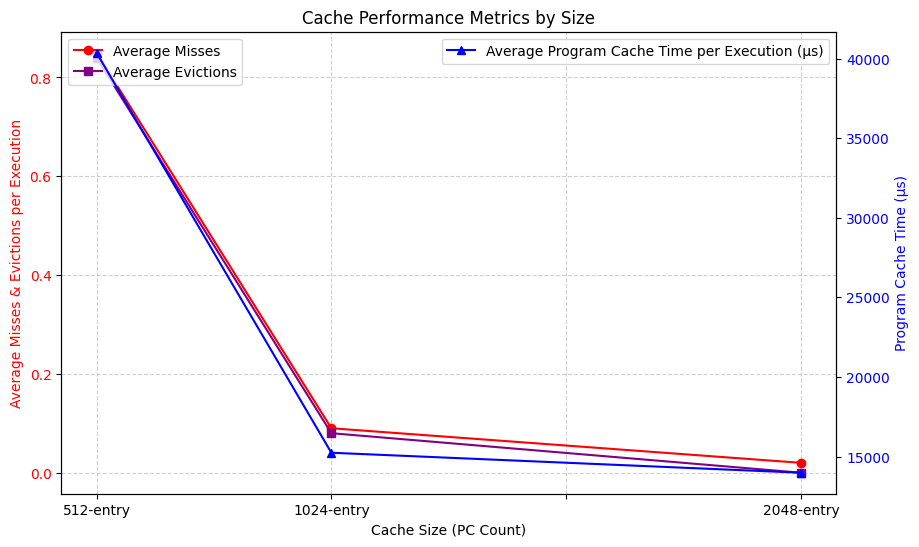

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the data
data = {
    "PC Count": ["2048PC", "1024PC", "512PC"],
    "Misses Mean": [0.02, 0.09, 0.85],
    "Evictions Mean": [0.00, 0.08, 0.84],
    "Program Cache Time Mean (µs)": [13984.30, 15239.21, 40363.97]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Convert PC Count into numerical values for proper scaling
df["PC Count Numeric"] = [2048, 1024, 512]  # Mapping PC Count to integers for better plotting
df = df.sort_values("PC Count Numeric")  # Ensure sorting for proper graphing

# Create the figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# --- Left Y-Axis (Misses & Evictions) ---
ax1.set_xlabel("Cache Size (PC Count)")
ax1.set_ylabel("Average Misses & Evictions per Execution", color='red')
ax1.plot(df["PC Count Numeric"], df["Misses Mean"], marker='o', linestyle='-', label="Average Misses", color='red')
ax1.plot(df["PC Count Numeric"], df["Evictions Mean"], marker='s', linestyle='-', label="Average Evictions", color='purple')
ax1.tick_params(axis='y', labelcolor='red')

# --- Right Y-Axis (Program Cache Time) ---
ax2 = ax1.twinx()
ax2.set_ylabel("Program Cache Time (µs)", color='blue')
ax2.plot(df["PC Count Numeric"], df["Program Cache Time Mean (µs)"], marker='^', linestyle='-', label="Average Program Cache Time per Execution (µs)", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Formatting
ax1.set_xticks([512, 1024, 1536, 2048])  # X-axis ticks at increments of 512
ax1.set_xticklabels(["512-entry", "1024-entry", "", "2048-entry"])  # Assign proper labels
ax1.grid(True, linestyle='--', alpha=0.6)

# Add Legends
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Show plot
plt.title("Cache Performance Metrics by Size")
plt.show()